In [335]:
import torch
from torch import nn   # pytroch building blocks for neural network
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Make data
import sklearn
from sklearn.datasets import make_circles

In [336]:
# Make data
sample_num = 1000
X, y = make_circles(sample_num,
                    noise = 0.025,
                    random_state = 314)

# Features in the data created
X[:5], y[:5]

(array([[-0.78341072, -0.11292122],
        [-0.95901674, -0.36690097],
        [ 0.78365307,  0.16764736],
        [-0.80657477, -0.65555333],
        [ 0.1713853 ,  0.98111385]]),
 array([1, 0, 1, 0, 0], dtype=int64))

In [337]:
# Convert the data to pandas dataframe
circles = pd.DataFrame({"X1": X[:,0], 
                        "X2": X[:,1],
                        "Label":y})
circles

,X1,X2,Label
0,-0.783411,-0.112921,1
1,-0.959017,-0.366901,0
2,0.783653,0.167647,1
3,-0.806575,-0.655553,0
4,0.171385,0.981114,0
...,...,...,...
995,-0.150737,-0.768587,1
996,0.644825,-0.464614,1
997,-0.704483,0.361199,1
998,0.043465,0.813719,1


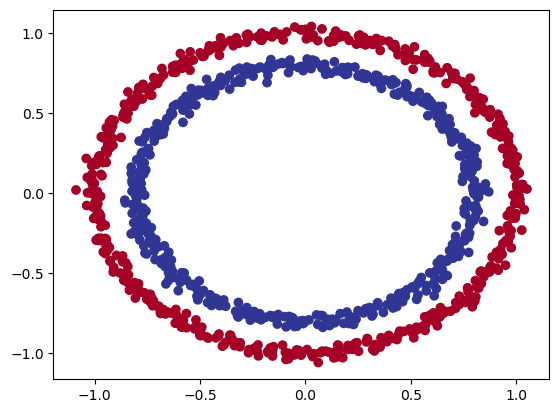

In [338]:
# Visualize the data
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [339]:
# Convert data to tensor
X = torch.tensor(X).type(torch.float)
y = torch.tensor(y).type(torch.float)

In [340]:
# Split data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=314)

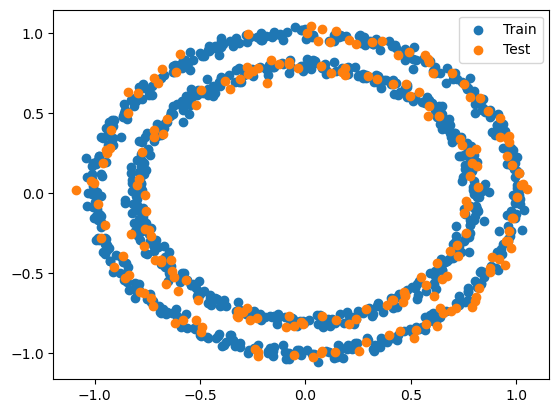

In [341]:
# Distribution of train-test data
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], label="Train")
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], label="Test")
plt.legend()

In [342]:
## Build a model for classification of circles

class CircleClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Create nn.linear layer that can handle the data
        self.layer_1 = nn.Linear(in_features=2, out_features=20) # take in two values(point coorninates) and upscale it to 20
        self.layer_2 = nn.Linear(in_features=20, out_features=20) # process 20 upscaled values
        self.layer_3 = nn.Linear(in_features=20, out_features=20) # process 20 upscaled values
        self.out_layer = nn.Linear(in_features=20, out_features=1) # take the 20 processed values and output one answer

    def forward(self, X):
        X = X.float()
        return self.out_layer(self.layer_3(self.layer_2(self.layer_1(X))))
    
# Random seed
torch.manual_seed(100)

model = CircleClassificationModel()

# Simpler way to set up basic model
'''
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=20),
    nn.Linear(in_features=20, out_features=20),
    nn.Linear(in_features=20, out_features=20),
    nn.Linear(in_features=20, out_features=1)
)
'''

model

CircleClassificationModel(
  (layer_1): Linear(in_features=2, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=20, bias=True)
  (out_layer): Linear(in_features=20, out_features=1, bias=True)
)

In [343]:
## Set up optimizer and loss function

# For binary classification, we can use binary cross entropy or categorical cross entropy

# In the case for classification, cross entropy is more effective that absolute/square mean error 
# As in the context of weight adjusting, the cross entropy penalize the model more for higher error values
# Since we are dealing with classification data, the model should indeed be penalized more...
    # as the values are describing catergories rather than values in a range


# Binary entropy loss with logit (logit: inverse of standard logistic distribution)
# With sigmoid activation function built in
loss_function = nn.BCEWithLogitsLoss() 

optimizer = torch.optim.SGD (params=model.parameters(),
                             lr=0.01,  # lr = learning rate, most important hyperparameter
                             )

In [344]:
# Accuracy fuction
def calculate_accuracy(y_truth, y_pred):
    correct = torch.eq(y_truth, y_pred).sum().item()
    return correct/len(y_pred) * 100

In [348]:
model(X_test)

tensor([[-0.2305],
        [-0.1064],
        [-0.1979],
        [-0.1211],
        [-0.2457],
        [-0.1758],
        [-0.2300],
        [-0.1643],
        [-0.2119],
        [-0.0765],
        [-0.1492],
        [-0.2373],
        [-0.2274],
        [-0.1869],
        [-0.0903],
        [-0.2255],
        [-0.1278],
        [-0.1144],
        [-0.1612],
        [-0.2179],
        [-0.2370],
        [-0.1252],
        [-0.2239],
        [-0.2005],
        [-0.2301],
        [-0.2519],
        [-0.0783],
        [-0.1591],
        [-0.2019],
        [-0.2031],
        [-0.1680],
        [-0.0917],
        [-0.0952],
        [-0.2527],
        [-0.0919],
        [-0.1410],
        [-0.0958],
        [-0.1003],
        [-0.1729],
        [-0.1446],
        [-0.2439],
        [-0.1568],
        [-0.1208],
        [-0.2080],
        [-0.0703],
        [-0.2452],
        [-0.0951],
        [-0.1280],
        [-0.2500],
        [-0.2284],
        [-0.0717],
        [-0.0843],
        [-0.